# train_Guam07v1.ipynb

This Jupyter workbook is based on [Train YOLOv8 on Custom Dataset – A Complete Tutorial](https://learnopencv.com/train-yolov8-on-custom-dataset/) Tutorial shows how to train an object detector for potholes. There is a [Jupyter notebook associated with this tutorial](https://github.com/spmallick/learnopencv/blob/master/Train-YOLOv8-on-Custom-Dataset-A-Complete-Tutorial/yolov8_fine_tuning.ipynb).

In [2]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

In [3]:
!pip install torchvision==0.18

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Added by Aubrey Moore
!pip list

Package                  Version
------------------------ ------------------------------------
absl-py                  0.15.0
annotated-types          0.6.0
appdirs                  1.4.4
apturl                   0.5.2
argon2-cffi              21.1.0
astunparse               1.6.3
attrs                    23.2.0
Babel                    2.8.0
backcall                 0.2.0
bcrypt                   3.2.0
beautifulsoup4           4.10.0
beniget                  0.4.1
bleach                   4.1.0
blinker                  1.4
blosc                    1.9.2
Bottleneck               1.3.2
Brlapi                   0.8.3
Brotli                   1.0.9
cachetools               5.0.0
certifi                  2020.6.20
cffi                     1.15.0
chardet                  4.0.0
clearml                  1.15.1
click                    8.0.3
cloudpickle              2.0.0
colorama                 0.4.4
command-not-found        0.3
cryptography             3.4.8
cupshelpers              1.0
cy

In [5]:
# Added by Aubrey Moore
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
Setup complete ✅ (16 CPUs, 62.6 GB RAM, 205.3/915.3 GB disk)


In [6]:
# Added by Aubrey Moore
import torch
torch.cuda.is_available()

True

## Install Ultralytics Package

In [7]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


## Download the Dataset

Code in this section commented out.

In [7]:
# os.makedirs('datasets', exist_ok=True)

In [8]:
# %cd datasets

/home/aubrey/Desktop/pothole2/datasets


In [9]:
# def download_file(url, save_name):
#     url = url
#     if not os.path.exists(save_name):
#         file = requests.get(url)
#         open(save_name, 'wb').write(file.content)
        
# download_file(
#     'https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1',
#     'pothole_dataset_v8.zip'
# )

In [10]:
# # Unzip the data file
# def unzip(zip_file=None):
#     try:
#         with zipfile.ZipFile(zip_file) as z:
#             z.extractall("./")
#             print("Extracted all")
#     except:
#         print("Invalid file")

# unzip('pothole_dataset_v8.zip')

Extracted all


In [11]:
# %cd ..

/home/aubrey/Desktop/pothole2


## Visualize Images from the Dataset

In [11]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [12]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [13]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

In [15]:
# # Visualize a few training images.
# plot(
#     image_paths='datasets/pothole_dataset_v8/train/images/', 
#     label_paths='datasets/pothole_dataset_v8/train/labels/',
#     num_samples=4,
# )

## Dataset YAML File

In [23]:
%%writefile ../datasets/Guam07v1/data.yaml
path: ~Desktop/Guam07-training-set/datasets/Guam07v1
train: images/train
val: images/val
test: images/test
names:
  0: zero
  1: low
  2: medium
  3: high
  4: fatal
  5: vcut

Overwriting ../datasets/Guam07v1/data.yaml


## YOLOv8 Nano Training

In [26]:
# Sample training for 5 epoch.
EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=/home/aubrey/Desktop/Guam07-training-set/datasets/Guam07v1/data.yaml epochs={EPOCHS} batch=8 name=Guam07v1_yolov8n

New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/aubrey/Desktop/Guam07-training-set/datasets/Guam07v1/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Guam07v1_yolov8n7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

## Evaluation on Validation Images

In [1]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50e7/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/la
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011603.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011614.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011616.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011661.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011662.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/

## Inference on Validation Images

In [7]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e7/weights/best.pt \
source=datasets/pothole_dataset_v8/valid/images \
imgsz=1280 \
name=yolov8n_v8_50e7_infer1280 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/271 /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011195.jpg: 736x1280 1 pothole, 59.6ms
image 2/271 /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011196.jpg: 736x1280 2 potholes, 5.3ms
image 3/271 /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011242.jpg: 736x1280 (no detections), 5.3ms
image 4/271 /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011243.jpg: 736x1280 3 potholes, 5.3ms
image 5/271 /home/aubrey/Desktop/pothole2/datasets/pothole_dataset_v8/valid/images/G0011244.jpg: 736x1280 1 pothole, 5.4ms
image 6/271 /home/aubrey/Desktop/pothole

## Visualize Validation Results

In [12]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

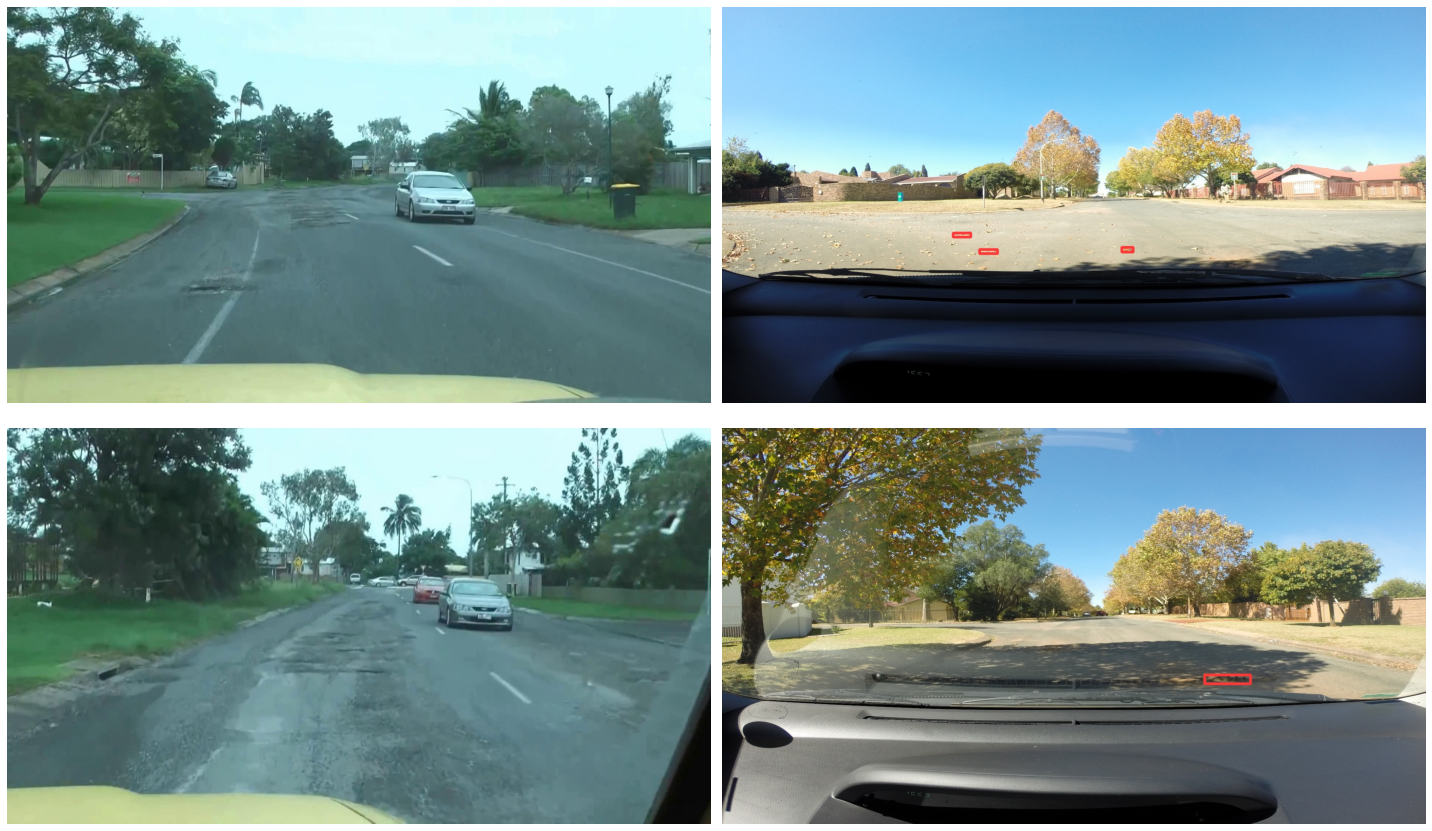

In [13]:
visualize('runs/detect/yolov8n_v8_50e7_infer1280/')